In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [ ]:
#Having walked through gradient boost by hand, now let's try it with SKlearn. We'll still use the European 
#Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [3]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1

#To select rows whose column value is in the list [] the data frame will contain all rows and columns 
# not listed in the data frame []
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

In [9]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0


In [6]:
# Make the categorical variable 'country' into dummies.
#take each unique value found in cntry and create a seperate column
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
#shape[0] gives the number of rows
#shape[1] would give number of columns and shape() gives # of rows and columns
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
#If there is no value before the first colon, it means to start at the beginning index of the list. 
#If there isn't a value after the first colon, it means to go all the way to the end of the list.
# in our example, it means to take all rows down to the the value of the offset.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [7]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [ ]:
#Since we're now working with a binary outcome, we've switched to a classifier. 
#Now our loss function can't be the residuals. Our options are "deviance", or "exponential". 
#Deviance is used for logistic regression, and we'll try that here.

In [25]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [ ]:
#Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface. 
#But they aren't quite a black box. We can get a measure of how important various features are by 
#counting how many times a feature is used over the course of many decision trees.

IndexError: index 12 is out of bounds for axis 1 with size 10

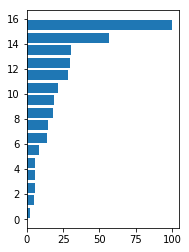

In [29]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance2 = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance2)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance2[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
#While this model is already doing alright, we've seen from the Type I and Type II error rates that there 
#is definitely room for improvement. Your task is to see how low you can get the error rates to go in the 
#test set, based on your model in the training set. Strategies you might use include:

#Creating new features
#Applying more overfitting-prevention strategies like subsampling
#More iterations
#Trying a different loss function
#Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

In [ ]:
#going to change the structure fo the week learner by allowing more leaves

In [37]:
# We'll make 500 iterations, use 3-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.03505182760501909
Percent Type II errors: 0.15234588106928532

Test set accuracy:
Percent Type I errors: 0.08466257668711656
Percent Type II errors: 0.18159509202453988


In [ ]:
# keep the number of tree depths to 3 but add more iterations

In [38]:
# We'll make 500 iterations, use 3-deep trees, and set our loss function.
params = {'n_estimators': 600,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.033006001091107476
Percent Type II errors: 0.14893617021276595

Test set accuracy:
Percent Type I errors: 0.08834355828220859
Percent Type II errors: 0.18282208588957055


In [ ]:
#getting better, let's add cross validation to see if we can make improvements

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

In [42]:
# We'll make 500 iterations, use 3-deep trees, and set our loss function.
params = {'n_estimators': 600,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)

#Adjusting the parameters to see if there is a different
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf, X, y, cv=10)

#clf.fit(X_train, y_train)
clf.fit(X, y)

predict_train = clf.predict(X)
predict_test = clf.predict(X)

# Accuracy tables.
table_train = pd.crosstab(y, predict_train, margins=True)
table_test = pd.crosstab(y, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print('The cv results are:',cv_results)


Training set accuracy:
Percent Type I errors: 0.03891002823125077
Percent Type II errors: 0.15551736835645022

Test set accuracy:
Percent Type I errors: 0.03891002823125077
Percent Type II errors: 0.15551736835645022
The cv results are: [0.7745098  0.75857843 0.72794118 0.71165644 0.75307125 0.73710074
 0.73710074 0.75307125 0.75552826 0.72727273]


In [44]:
# Perform subsampling and we'll make 600 iterations, use 3-deep trees, and set our loss function.
params = {'n_estimators': 600,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)

#Adjusting the parameters to see if there is a different
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf, X_train, y_train, cv=10)


clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print('The cv results are:',cv_results)


Training set accuracy:
Percent Type I errors: 0.033006001091107476
Percent Type II errors: 0.14893617021276595

Test set accuracy:
Percent Type I errors: 0.08834355828220859
Percent Type II errors: 0.18282208588957055
The cv results are: [0.74659401 0.77520436 0.55449591 0.72615804 0.7585266  0.73942701
 0.75716235 0.73260573 0.71038251 0.40983607]


In [45]:
# We'll make 700 iterations, use 4-deep trees, and set our loss function.
params = {'n_estimators': 700,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))




Training set accuracy:
Percent Type I errors: 0.015002727768685215
Percent Type II errors: 0.0991543917075832

Test set accuracy:
Percent Type I errors: 0.09570552147239264
Percent Type II errors: 0.18282208588957055


In [ ]:
# In conclusion increasing the number of iterations and depth improved the accuracy of the model